# Bayesian modelling for Emotions
---
## Investigating Emotions over the Monetary Outcomes of Wheel-Spin Game using Bayesian Models

***by Irem Arici***

**January 2024**

---

The Bayesian emotion model has been built to investigate the effects of amount won, the probability of occurrence of amount won, and the angle of pointer which landed in the amount of won on the emotion experienced. 

This notebook contains Bayesian models, posterior statistics, and plots only.

In [1]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


***Dataset taken from Ong et al. (2015)***

In [2]:
df = pd.read_csv("expt1data.csv")

# Population-level Bayesian models
---

For each of 8 emotions, a different Bayesian model has been implemented. In every model, `winAmount`, `winProbability`, and `angleProportion` has been added as continuous variables to the equation:

$$\begin{align}
\mu_\text{Emotion} = \alpha + \beta_\text{winAmount} \times \text{win} + \beta_\text{winProbability} \times \text{winProb} + \beta_\text{angleProportion} \times \text{angleProp}
\end{align}$$

In each emotion model, the likelihood distribution is defined as:

$$\begin{align} \\ \text {Emotion} \sim \text {Normal} (\mu_\text{Emotion}, \sigma)\end{align}$$

The priors are defined as follows:

$$\begin{align}
\\
\beta \sim \text {Normal} (0,10)
\\
\sigma \sim \text {Uniform} (0, 10)
\\
\end{align}$$

## Happy

In [3]:
with pm.Model() as m1:
    # Data
    happy = pm.MutableData("happy", df.happy)
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    # Priors
    alpha = pm.Normal("alpha", mu = 0, sigma=10)
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    sigma = pm.Uniform("sigma", 0,10)
    
    mu = alpha + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    H = pm.Normal("H", mu = mu, sigma = sigma, observed = happy)
    
    trace1 = pm.sample(idata_kwargs = {'log_likelihood': True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_wa, beta_wp, beta_ap, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.


In [4]:
az.summary(trace1, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha,2.833,0.222,2.435,3.259
beta_wa,0.069,0.002,0.066,0.072
beta_wp,-0.523,0.501,-1.422,0.453
beta_ap,-0.242,0.170,-0.558,0.073
sigma,1.523,0.034,1.457,1.587


### Plots

Text(0.5, 1.0, 'Posterior distribution of alpha-happy')

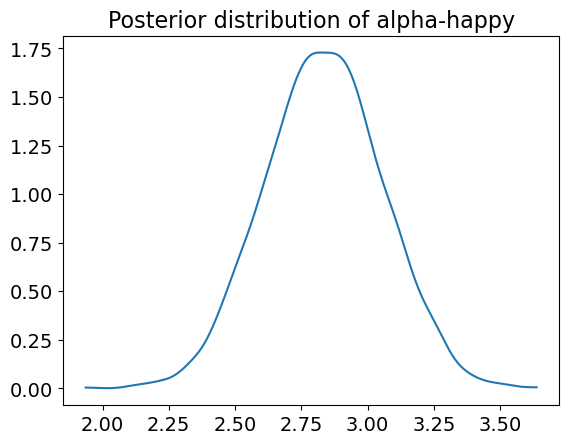

In [7]:
az.plot_dist(trace1.posterior["alpha"])
plt.title("Posterior distribution of alpha-happy", size = 16)

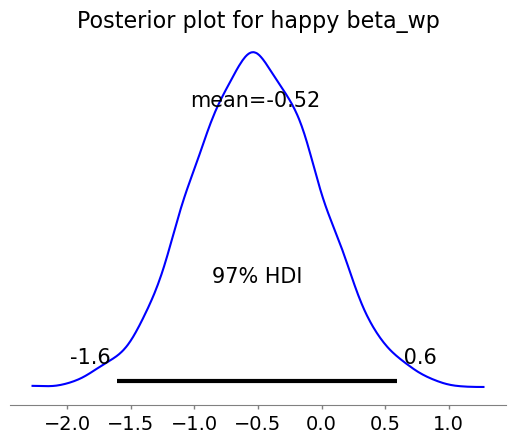

In [8]:
az.plot_posterior(trace1.posterior["beta_wp"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for happy beta_wp", size = 16)
plt.savefig(fname="happy_beta_wp")

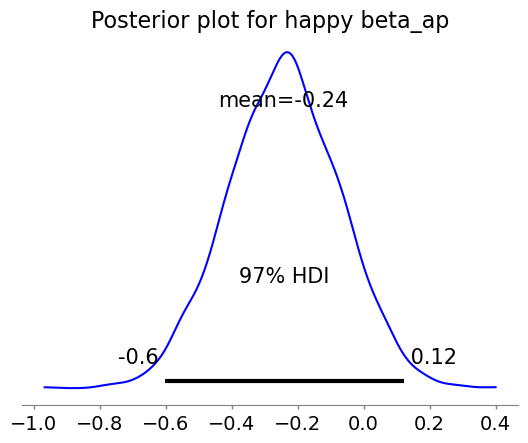

In [9]:
az.plot_posterior(trace1.posterior["beta_ap"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for happy beta_ap", size = 16)
plt.savefig(fname="happy_beta_ap")

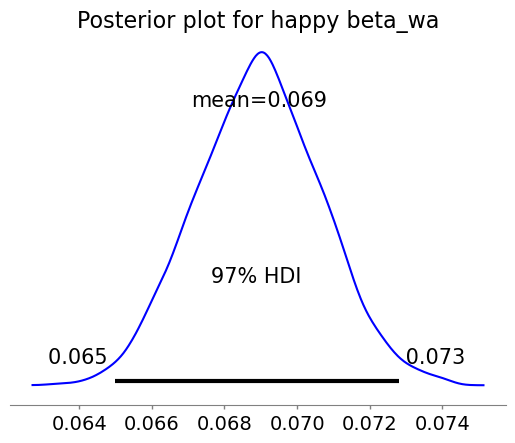

In [10]:
az.plot_posterior(trace1.posterior["beta_wa"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for happy beta_wa", size = 16)
plt.savefig(fname="happy_beta_wa")

## Sad

In [11]:
with pm.Model() as m2:
    #data
    sad = pm.MutableData("sad", df.sad)
    
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    #priors
    alpha = pm.Normal("alpha", mu = 0, sigma=10)
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    sigma = pm.Uniform("sigma", 0,10)
    
    mu = alpha + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    Sad = pm.Normal("Sad", mu = mu, sigma = sigma, observed = sad)
    
    trace2 = pm.sample(idata_kwargs = {'log_likelihood': True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_wa, beta_wp, beta_ap, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


In [12]:
az.summary(trace2, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha,5.107,0.262,4.623,5.612
beta_wa,-0.045,0.002,-0.049,-0.042
beta_wp,-0.453,0.587,-1.523,0.655
beta_ap,0.196,0.197,-0.177,0.558
sigma,1.793,0.040,1.716,1.866


### Plots

Text(0.5, 1.0, 'Posterior distribution of alpha-sad')

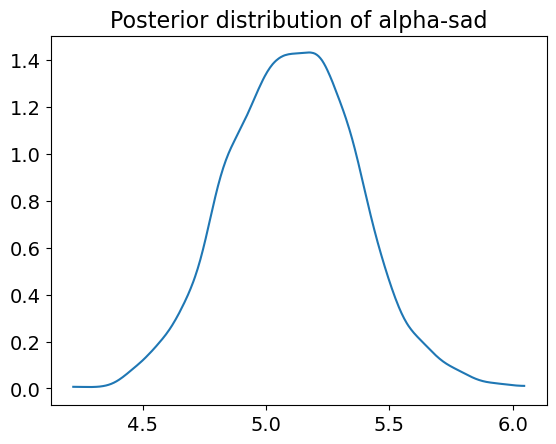

In [15]:
az.plot_dist(trace2.posterior["alpha"])
plt.title("Posterior distribution of alpha-sad", size = 16)

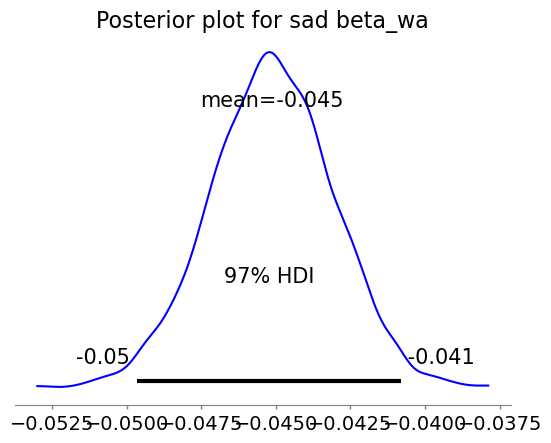

In [16]:
az.plot_posterior(trace2.posterior["beta_wa"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for sad beta_wa", size = 16)
plt.savefig(fname="sad_beta_wa")

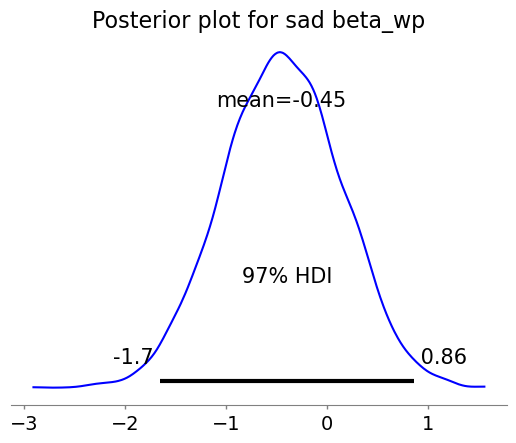

In [17]:
az.plot_posterior(trace2.posterior["beta_wp"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for sad beta_wp", size = 16)
plt.savefig(fname="sad_beta_wp")

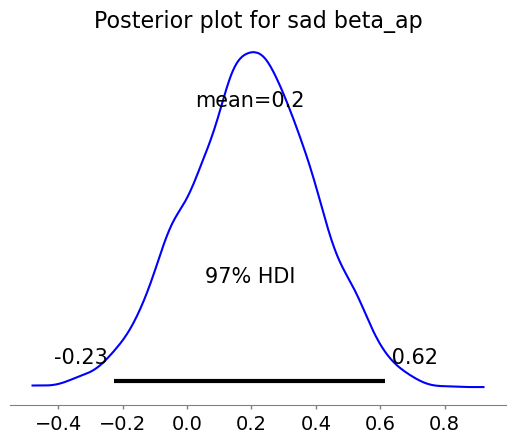

In [18]:
az.plot_posterior(trace2.posterior["beta_ap"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for sad beta_ap", size = 16)
plt.savefig(fname="sad_beta_ap")

## Anger

In [19]:
with pm.Model() as m3:
    #data
    anger = pm.MutableData("anger", df.anger)
    
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    #priors
    alpha = pm.Normal("alpha", mu = 0, sigma=10)
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    sigma = pm.Uniform("sigma", 0,10)
    
    mu = alpha + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    A = pm.Normal("A", mu = mu, sigma = sigma, observed = anger)
    
    trace3 = pm.sample(idata_kwargs = {'log_likelihood': True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_wa, beta_wp, beta_ap, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


In [20]:
az.summary(trace3, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha,3.862,0.245,3.419,4.345
beta_wa,-0.028,0.002,-0.032,-0.025
beta_wp,-1.035,0.550,-2.136,-0.065
beta_ap,0.150,0.184,-0.196,0.495
sigma,1.660,0.036,1.590,1.729


### Plots

Text(0.5, 1.0, 'Posterior distribution of alpha-anger')

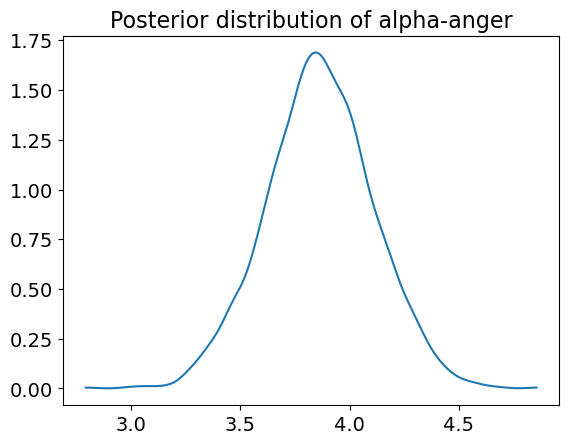

In [23]:
az.plot_dist(trace3.posterior["alpha"])
plt.title("Posterior distribution of alpha-anger", size = 16)

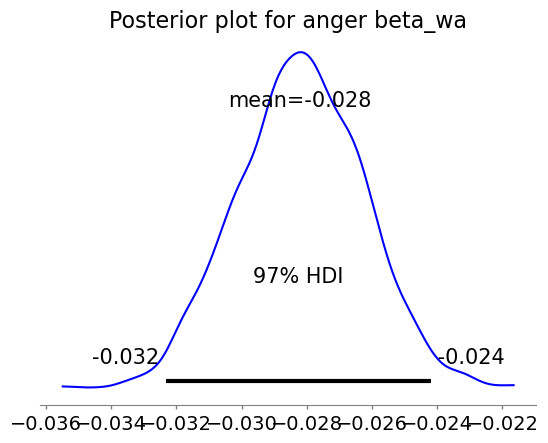

In [24]:
az.plot_posterior(trace3.posterior["beta_wa"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for anger beta_wa", size = 16)
plt.savefig(fname="anger_beta_wa")

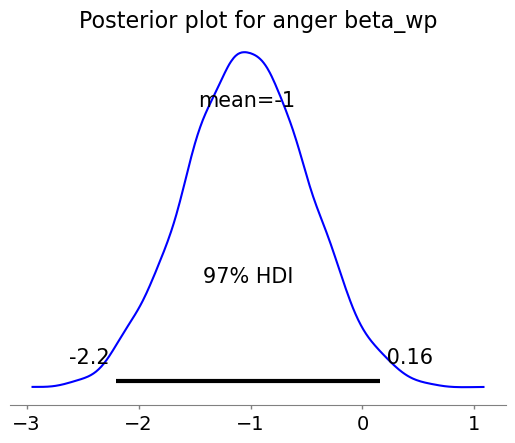

In [25]:
az.plot_posterior(trace3.posterior["beta_wp"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for anger beta_wp", size = 16)
plt.savefig(fname="anger_beta_wp")

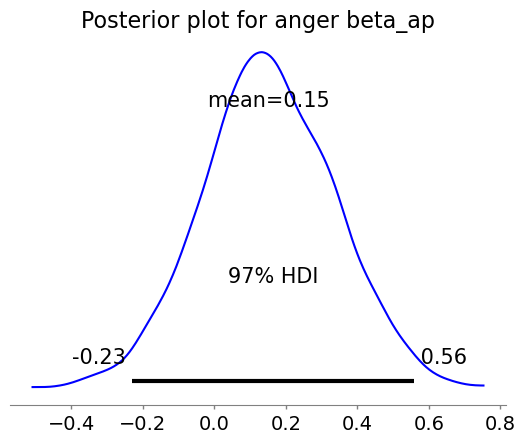

In [26]:
az.plot_posterior(trace3.posterior["beta_ap"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for anger beta_ap", size = 16)
plt.savefig(fname="anger_beta_ap")

## Fear

In [27]:
with pm.Model() as m4:
    #data
    fear = pm.MutableData("fear", df.fear)
    
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    #priors
    alpha = pm.Normal("alpha", mu = 0, sigma=10)
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    sigma = pm.Uniform("sigma", 0,10)
    
    mu = alpha + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    F = pm.Normal("F", mu = mu, sigma = sigma, observed = fear)
    
    trace4 = pm.sample(idata_kwargs = {'log_likelihood': True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_wa, beta_wp, beta_ap, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


In [28]:
az.summary(trace4, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha,1.639,0.145,1.364,1.902
beta_wa,-0.006,0.001,-0.008,-0.004
beta_wp,-0.201,0.329,-0.813,0.398
beta_ap,0.133,0.112,-0.083,0.339
sigma,1.013,0.023,0.971,1.056


### Plots

Text(0.5, 1.0, 'Posterior distribution of alpha-fear')

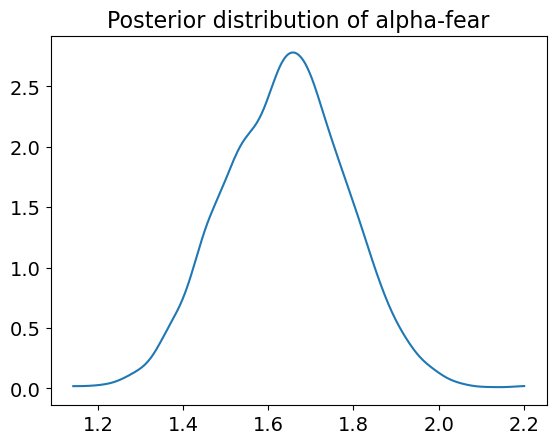

In [31]:
az.plot_dist(trace4.posterior["alpha"])
plt.title("Posterior distribution of alpha-fear", size = 16)

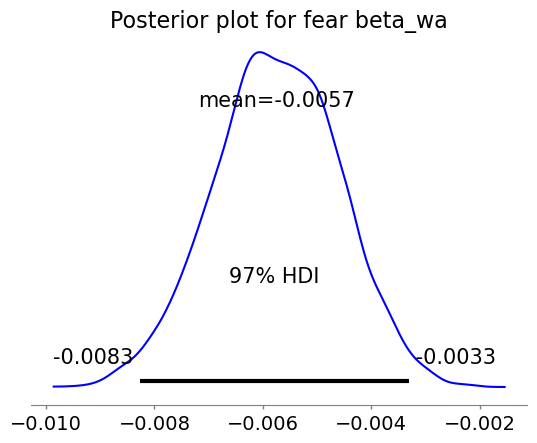

In [32]:
az.plot_posterior(trace4.posterior["beta_wa"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for fear beta_wa", size = 16)
plt.savefig(fname="fear_beta_wa")

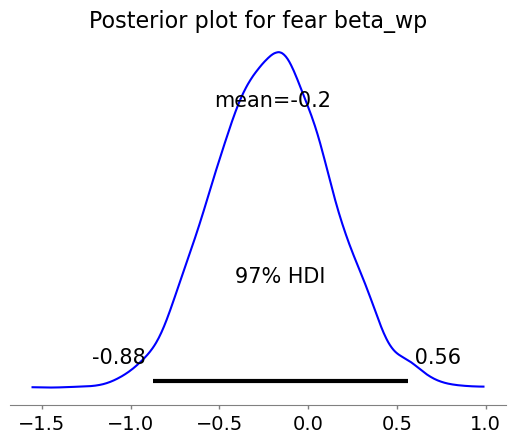

In [33]:
az.plot_posterior(trace4.posterior["beta_wp"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for fear beta_wp", size = 16)
plt.savefig(fname="fear_beta_wp")

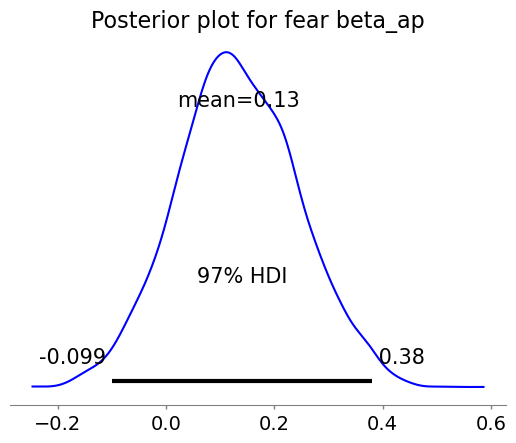

In [34]:
az.plot_posterior(trace4.posterior["beta_ap"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for fear beta_ap", size = 16)
plt.savefig(fname="fear_beta_ap")

## Surprise

In [35]:
with pm.Model() as m5:
    #data
    surprise = pm.MutableData("surprise", df.surprise)
    
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    #priors
    alpha = pm.Normal("alpha", mu = 0, sigma=10)
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    sigma = pm.Uniform("sigma", 0,10)
    
    mu = alpha + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    Surp = pm.Normal("Surp", mu = mu, sigma = sigma, observed = surprise)
    
    trace5 = pm.sample(idata_kwargs = {'log_likelihood': True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_wa, beta_wp, beta_ap, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


In [36]:
az.summary(trace5, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha,6.007,0.308,5.448,6.596
beta_wa,0.029,0.002,0.024,0.033
beta_wp,-6.888,0.693,-8.262,-5.662
beta_ap,0.036,0.229,-0.397,0.454
sigma,2.039,0.047,1.953,2.123


### Plots

Text(0.5, 1.0, 'Posterior distribution of alpha-surprise')

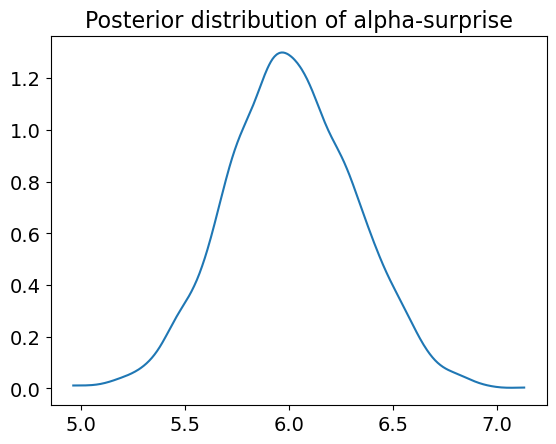

In [39]:
az.plot_dist(trace5.posterior["alpha"])
plt.title("Posterior distribution of alpha-surprise", size = 16)

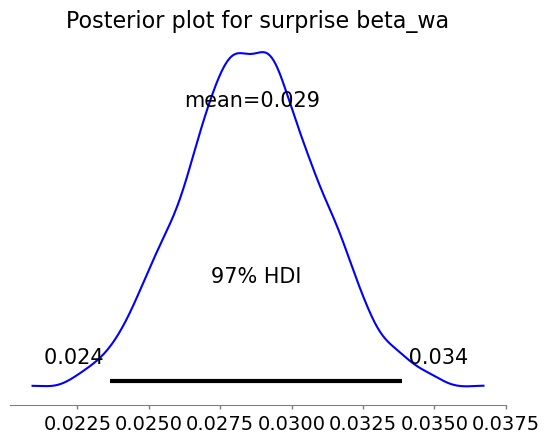

In [40]:
az.plot_posterior(trace5.posterior["beta_wa"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for surprise beta_wa", size = 16)
plt.savefig(fname="sur_beta_wa")

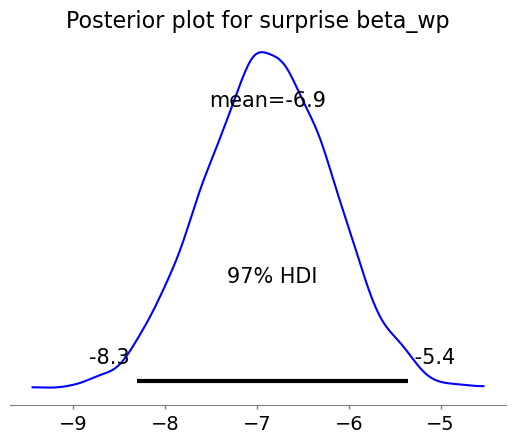

In [41]:
az.plot_posterior(trace5.posterior["beta_wp"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for surprise beta_wp", size = 16)
plt.savefig(fname="sur_beta_wp")

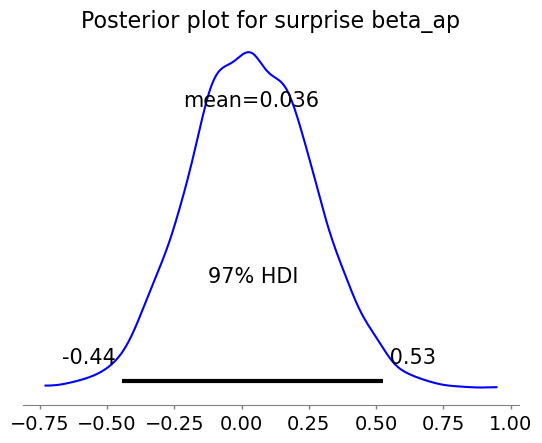

In [42]:
az.plot_posterior(trace5.posterior["beta_ap"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for surprise beta_ap", size = 16)
plt.savefig(fname="sur_beta_ap")

## Disgust

In [43]:
with pm.Model() as m6:
    #data
    disg = pm.MutableData("disgust", df.disgust)
    
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    #priors
    alpha = pm.Normal("alpha", mu = 0, sigma=10)
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    sigma = pm.Uniform("sigma", 0,10)
    
    mu = alpha + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    Disg = pm.Normal("Disg", mu = mu, sigma = sigma, observed = disg)
    
    trace6 = pm.sample(idata_kwargs = {'log_likelihood': True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_wa, beta_wp, beta_ap, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


In [44]:
az.summary(trace6, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha,3.460,0.227,3.048,3.899
beta_wa,-0.026,0.002,-0.029,-0.022
beta_wp,-0.827,0.505,-1.803,0.088
beta_ap,0.251,0.172,-0.065,0.582
sigma,1.507,0.034,1.443,1.572


### Plots

Text(0.5, 1.0, 'Posterior distribution of alpha-disgust')

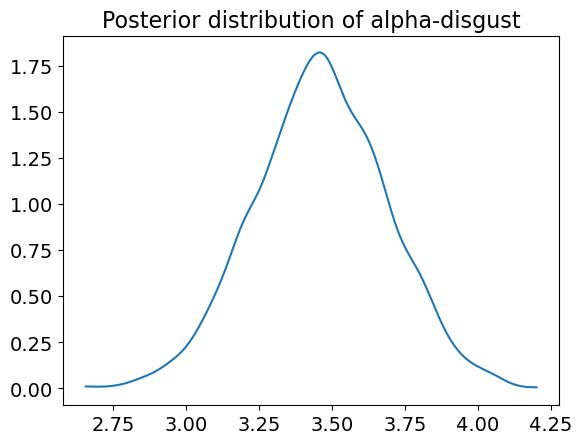

In [47]:
az.plot_dist(trace6.posterior["alpha"])
plt.title("Posterior distribution of alpha-disgust", size = 16)

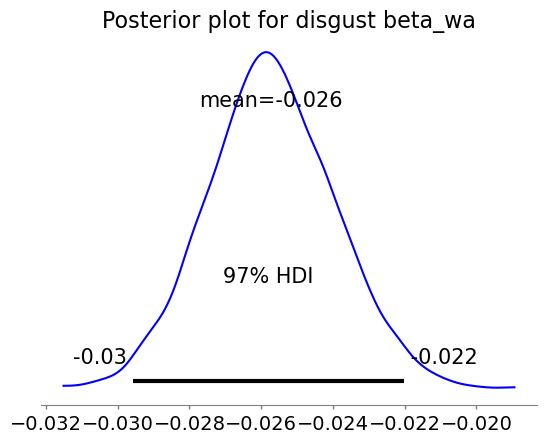

In [48]:
az.plot_posterior(trace6.posterior["beta_wa"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for disgust beta_wa", size = 16)
plt.savefig(fname="disg_beta_wa")

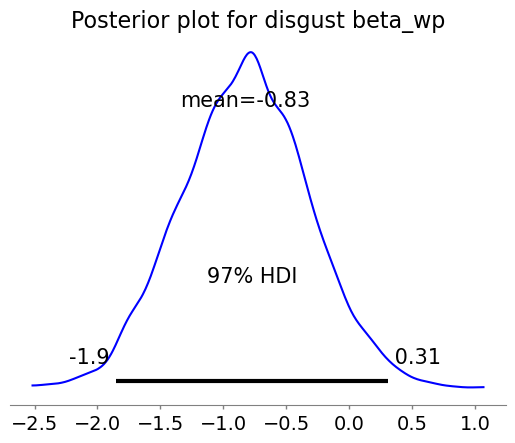

In [49]:
az.plot_posterior(trace6.posterior["beta_wp"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for disgust beta_wp", size = 16)
plt.savefig(fname="disg_beta_wp")

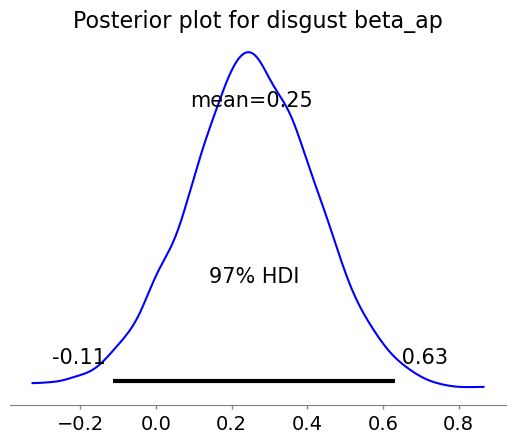

In [50]:
az.plot_posterior(trace6.posterior["beta_ap"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for disgust beta_ap", size = 16)
plt.savefig(fname="disg_beta_ap")

## Content

In [51]:
with pm.Model() as m7:
    #data
    cont = pm.MutableData("content", df.content)
    
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    #priors
    alpha = pm.Normal("alpha", mu = 0, sigma=10)
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    sigma = pm.Uniform("sigma", 0,10)
    
    mu = alpha + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    Cont = pm.Normal("Cont", mu = mu, sigma = sigma, observed = cont)
    
    trace7 = pm.sample(idata_kwargs = {'log_likelihood': True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_wa, beta_wp, beta_ap, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


In [52]:
az.summary(trace7, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha,2.665,0.330,2.012,3.249
beta_wa,0.051,0.003,0.046,0.056
beta_wp,-0.695,0.740,-2.072,0.704
beta_ap,-0.030,0.250,-0.521,0.419
sigma,2.196,0.050,2.103,2.284


### Plots

Text(0.5, 1.0, 'Posterior distribution of alpha-content')

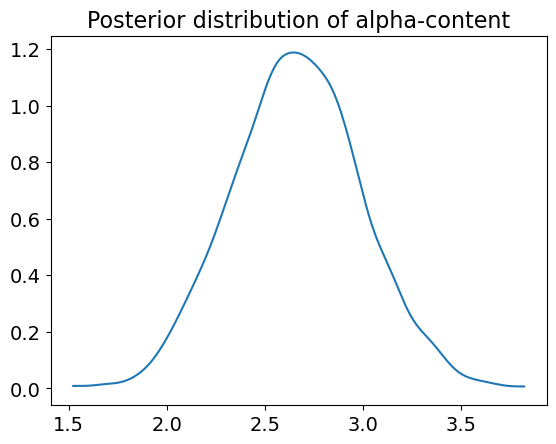

In [55]:
az.plot_dist(trace7.posterior["alpha"])
plt.title("Posterior distribution of alpha-content", size = 16)

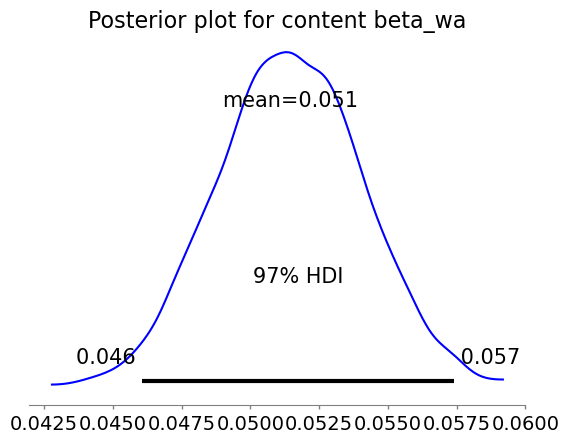

In [56]:
az.plot_posterior(trace7.posterior["beta_wa"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for content beta_wa", size = 16)
plt.savefig(fname="cont_beta_wa")

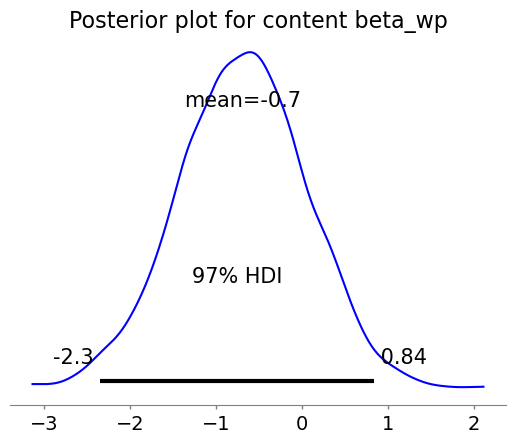

In [57]:
az.plot_posterior(trace7.posterior["beta_wp"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for content beta_wp", size = 16)
plt.savefig(fname="cont_beta_wp")

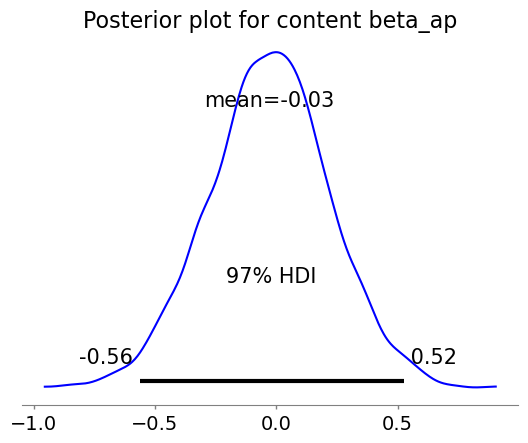

In [58]:
az.plot_posterior(trace7.posterior["beta_ap"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for content beta_ap", size = 16)
plt.savefig(fname="cont_beta_ap")

## Disappointed

In [59]:
with pm.Model() as m8:
    #data
    disapp = pm.MutableData("disappointed", df.disapp)
    
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    #priors
    alpha = pm.Normal("alpha", mu = 0, sigma=10)
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    sigma = pm.Uniform("sigma", 0,10)
    
    mu = alpha + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    Dis = pm.Normal("Dis", mu = mu, sigma = sigma, observed = disapp)
    
    trace8 = pm.sample(idata_kwargs = {'log_likelihood': True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_wa, beta_wp, beta_ap, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


In [60]:
az.summary(trace8, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha,6.945,0.274,6.425,7.461
beta_wa,-0.068,0.002,-0.072,-0.064
beta_wp,0.204,0.618,-0.940,1.336
beta_ap,0.433,0.209,0.020,0.814
sigma,1.894,0.042,1.816,1.973


### Plots

Text(0.5, 1.0, 'Posterior distribution of alpha-disappointed')

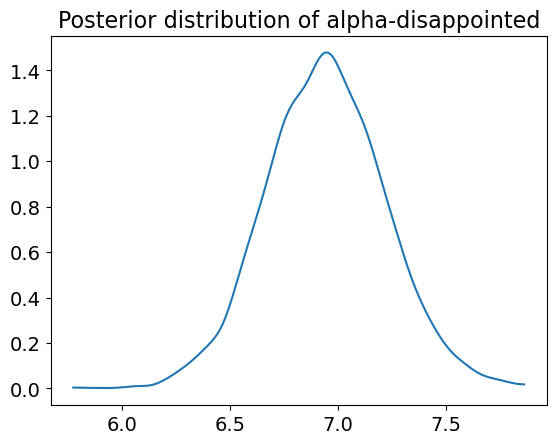

In [63]:
az.plot_dist(trace8.posterior["alpha"])
plt.title("Posterior distribution of alpha-disappointed", size = 16)

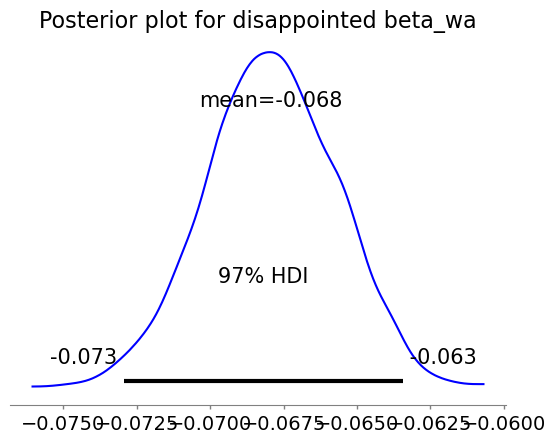

In [64]:
az.plot_posterior(trace8.posterior["beta_wa"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for disappointed beta_wa", size = 16)
plt.savefig(fname="disap_beta_wa")

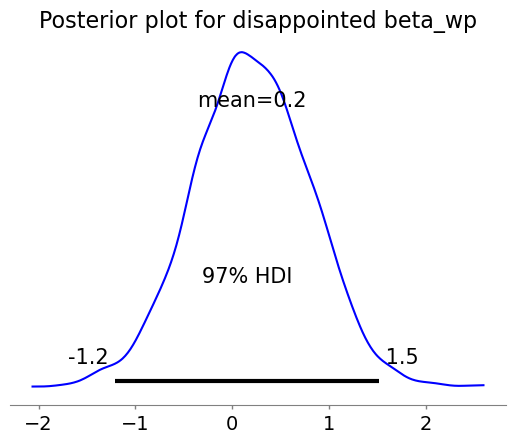

In [65]:
az.plot_posterior(trace8.posterior["beta_wp"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for disappointed beta_wp", size = 16)
plt.savefig(fname="disap_beta_wp")

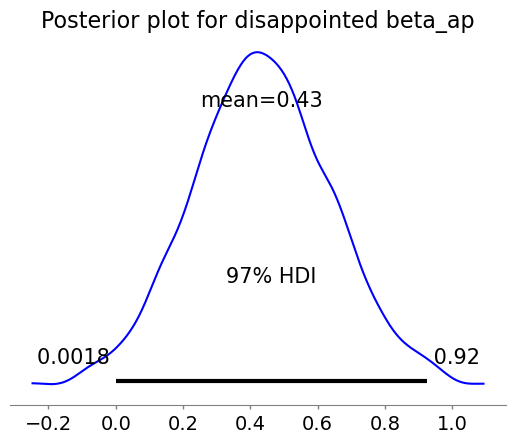

In [66]:
az.plot_posterior(trace8.posterior["beta_ap"], point_estimate="mean", color="blue",
                 hdi_prob=0.97)
plt.title("Posterior plot for disappointed beta_ap", size = 16)
plt.savefig(fname="disap_beta_ap")

# Worker-specific Bayesian models
---

Additional Bayesian models have been built to see the effects mentioned above on
a worker basis. These models are constructed with the same priors for $\beta$ coefficients as the
previous models, except, for each (standardized) emotion
$$\begin{align}
\\
\text {Emotion} \sim \text {Normal} (\hat{\mu}, \sigma)
\\
\hat{\mu} \sim \text {Normal} (0,1)
\\
\sigma \sim \text {Exponential} (1)
\\
\end{align}$$

and the equation for this new model has been defined as below:

$$\begin{align}
\hat{\mu}_\text{Emotion} = \hat{\alpha}_\text{[worker]} + \beta_\text{winAmount} \times \text{win} + \beta_\text{winProbability} \times \text{winProb} + \beta_\text{angleProportion} \times \text{angleProp}
\end{align}$$

In [67]:
def standardize(series):
    std_series = (series - series.mean()) / series.std()
    return std_series

## Happy

In [68]:
with pm.Model() as m_01:
    # Data
    h = pm.MutableData("happy", standardize(df.happy))
    worker = pm.MutableData("worker", df.workerid)
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    # Priors
    alpha_bar = pm.Normal("alpha_bar", mu = 0, sigma=1)
    sigma_a = pm.Exponential("sigma_a", 1)
    
    alpha = pm.Normal("alpha", mu = alpha_bar, sigma = sigma_a, shape=len(df['workerid'].unique()))
    
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    
    mu = alpha[worker-1] + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    H = pm.Normal("H", mu = mu, sigma = sigma_a, observed = h)
    
    trace_01 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_bar, sigma_a, alpha, beta_wa, beta_wp, beta_ap]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


In [69]:
az.summary(trace_01, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha_bar,-1.362,0.099,-1.537,-1.175
alpha[0],-1.335,0.178,-1.681,-1.006
alpha[1],-1.537,0.184,-1.889,-1.199
alpha[2],-1.301,0.180,-1.626,-0.965
alpha[3],-1.451,0.187,-1.810,-1.097
...,...,...,...,...
alpha[99],-1.376,0.179,-1.722,-1.058
beta_wa,0.028,0.001,0.027,0.029
beta_wp,-0.321,0.185,-0.663,0.025
beta_ap,-0.023,0.063,-0.147,0.088


### Plots

Text(0.5, 1.0, 'Posterior distribution plot for worker_alpha_happy')

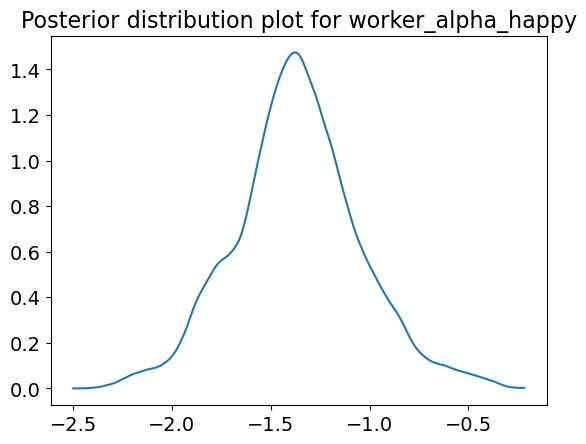

In [72]:
az.plot_dist(trace_01.posterior["alpha"].mean(axis=0))
plt.title("Posterior distribution plot for worker_alpha_happy", size = 16)

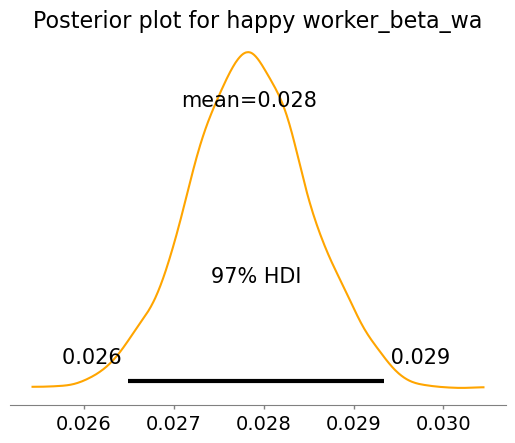

In [73]:
az.plot_posterior(trace_01.posterior["beta_wa"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for happy worker_beta_wa", size = 16)
plt.savefig(fname="happy_worker_beta_wa")

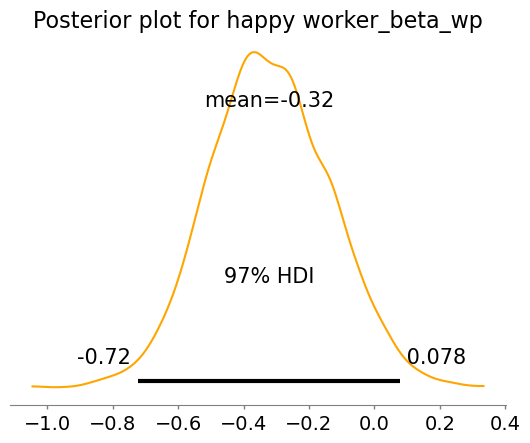

In [74]:
az.plot_posterior(trace_01.posterior["beta_wp"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for happy worker_beta_wp", size = 16)
plt.savefig(fname="happy_worker_beta_wp")

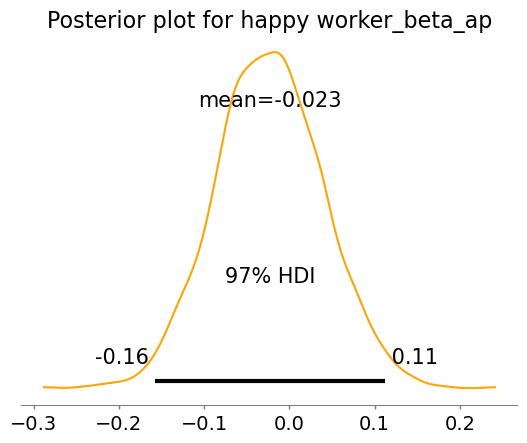

In [75]:
az.plot_posterior(trace_01.posterior["beta_ap"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for happy worker_beta_ap", size = 16)
plt.savefig(fname="happy_worker_beta_ap")

## Disappointed

In [76]:
with pm.Model() as m_02:
    #data
    d = pm.MutableData("disappointed", standardize(df.disapp))
    
    worker = pm.MutableData("worker", df.workerid)
    
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    #priors
    alpha_bar = pm.Normal("alpha_bar", mu = 0, sigma=1)
    sigma_a = pm.Exponential("sigma_a", 1)
    
    alpha = pm.Normal("alpha", mu = alpha_bar, sigma = sigma_a, shape=len(df['workerid'].unique()))
    
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    
    mu = alpha[worker-1] + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    Dis = pm.Normal("Dis", mu = mu, sigma = sigma_a, observed = d)
    
    trace_02 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_bar, sigma_a, alpha, beta_wa, beta_wp, beta_ap]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [77]:
az.summary(trace_02, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha_bar,1.255,0.107,1.054,1.451
alpha[0],1.748,0.199,1.389,2.128
alpha[1],1.169,0.202,0.787,1.549
alpha[2],0.915,0.200,0.542,1.295
alpha[3],1.407,0.201,1.005,1.763
...,...,...,...,...
alpha[99],1.153,0.200,0.782,1.533
beta_wa,-0.025,0.001,-0.026,-0.023
beta_wp,0.197,0.203,-0.190,0.572
beta_ap,-0.001,0.071,-0.125,0.138


### Plots

Text(0.5, 1.0, 'Posterior distribution plot for worker_alpha_disappointed')

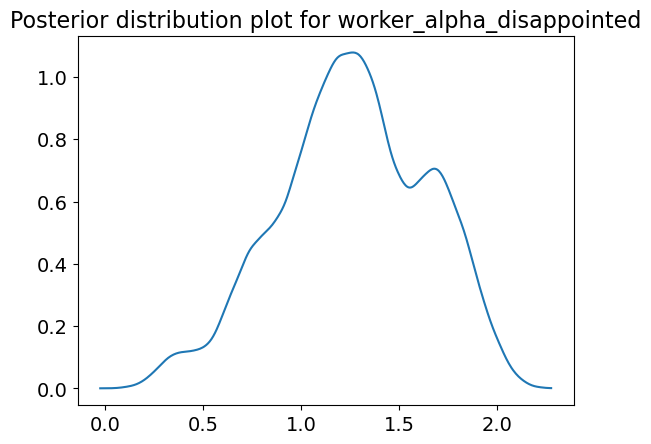

In [81]:
az.plot_dist(trace_02.posterior["alpha"].mean(axis=0))
plt.title("Posterior distribution plot for worker_alpha_disappointed", size = 16)

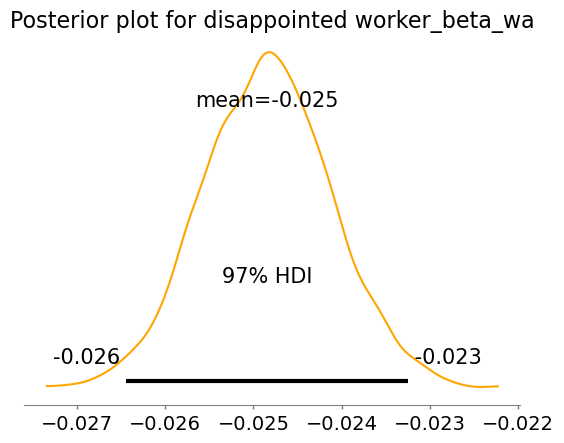

In [82]:
az.plot_posterior(trace_02.posterior["beta_wa"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for disappointed worker_beta_wa", size = 16)
plt.savefig(fname="disapp_worker_beta_wa")

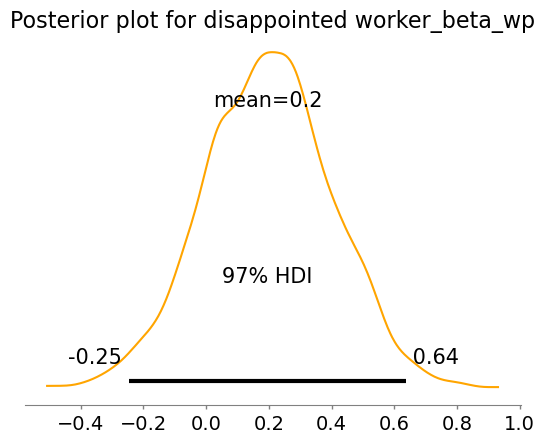

In [83]:
az.plot_posterior(trace_02.posterior["beta_wp"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for disappointed worker_beta_wp", size = 16)
plt.savefig(fname="disapp_worker_beta_wp")

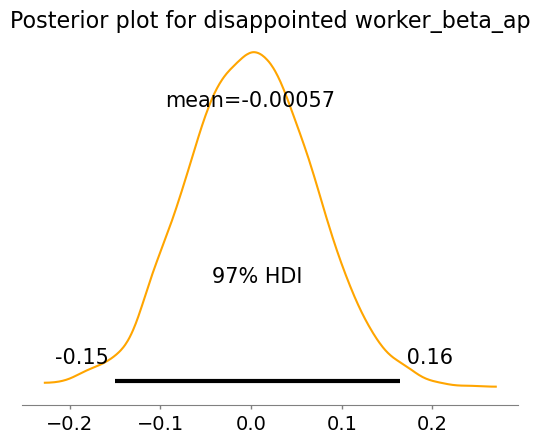

In [84]:
az.plot_posterior(trace_02.posterior["beta_ap"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for disappointed worker_beta_ap", size = 16)
plt.savefig(fname="disapp_worker_beta_ap")

## Anger

In [85]:
with pm.Model() as m_03:
    #data
    a = pm.MutableData("anger", standardize(df.anger))
    
    worker = pm.MutableData("worker", df.workerid)
    
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    #priors
    alpha_bar = pm.Normal("alpha_bar", mu = 0, sigma=1)
    sigma_a = pm.Exponential("sigma_a", 1)
    
    alpha = pm.Normal("alpha", mu = alpha_bar, sigma = sigma_a, shape=len(df['workerid'].unique()))
    
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    
    mu = alpha[worker-1] + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    A = pm.Normal("A", mu = mu, sigma = sigma_a, observed = a)
    
    trace_03 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_bar, sigma_a, alpha, beta_wa, beta_wp, beta_ap]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [86]:
az.summary(trace_03, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha_bar,0.868,0.128,0.617,1.096
alpha[0],0.913,0.237,0.482,1.366
alpha[1],1.270,0.237,0.837,1.712
alpha[2],0.588,0.236,0.166,1.041
alpha[3],1.408,0.239,0.933,1.835
...,...,...,...,...
alpha[99],0.472,0.244,0.032,0.933
beta_wa,-0.014,0.001,-0.015,-0.012
beta_wp,-0.442,0.235,-0.902,-0.004
beta_ap,0.014,0.083,-0.146,0.161


### Plots

Text(0.5, 1.0, 'Posterior distribution plot for worker_alpha_anger')

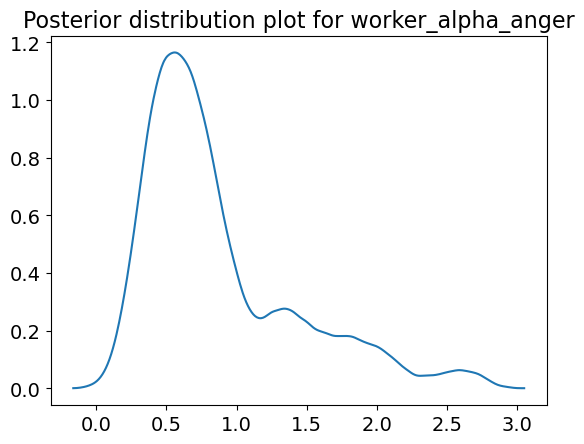

In [90]:
az.plot_dist(trace_03.posterior["alpha"].mean(axis=0))
plt.title("Posterior distribution plot for worker_alpha_anger", size = 16)

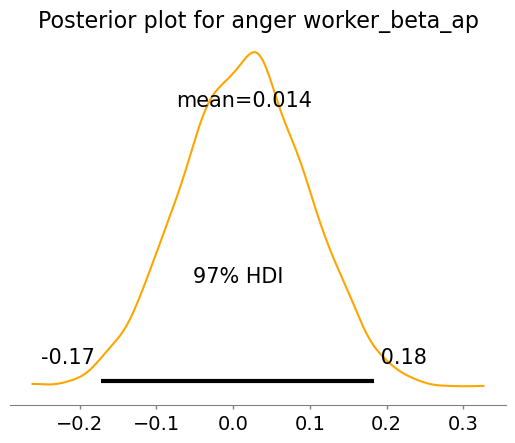

In [91]:
az.plot_posterior(trace_03.posterior["beta_ap"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for anger worker_beta_ap", size = 16)
plt.savefig(fname="anger_worker_beta_ap")

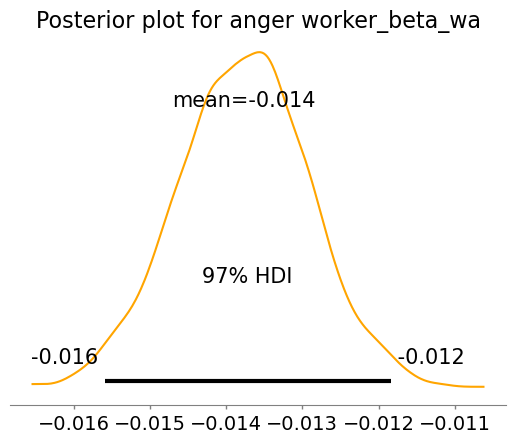

In [92]:
az.plot_posterior(trace_03.posterior["beta_wa"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for anger worker_beta_wa", size = 16)
plt.savefig(fname="anger_worker_beta_wa")

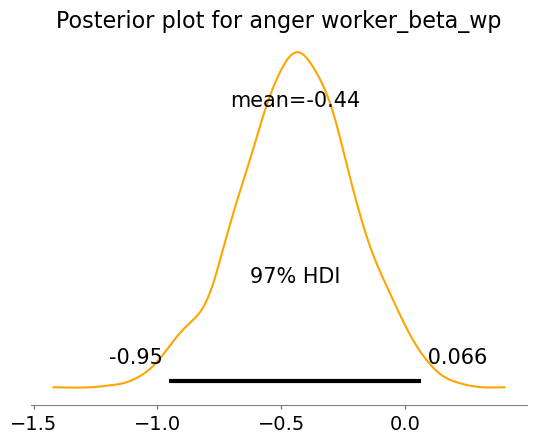

In [93]:
az.plot_posterior(trace_03.posterior["beta_wp"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for anger worker_beta_wp", size = 16)
plt.savefig(fname="anger_worker_beta_wp")

## Content

In [94]:
with pm.Model() as m_04:
    #data
    c = pm.MutableData("content", standardize(df.content))
    
    worker = pm.MutableData("worker", df.workerid)
    
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    #priors
    alpha_bar = pm.Normal("alpha_bar", mu = 0, sigma=1)
    sigma_a = pm.Exponential("sigma_a", 1)
    
    alpha = pm.Normal("alpha", mu = alpha_bar, sigma = sigma_a, shape=len(df['workerid'].unique()))
    
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    
    mu = alpha[worker-1] + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    C = pm.Normal("C", mu = mu, sigma = sigma_a, observed = c)
    
    trace_04 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_bar, sigma_a, alpha, beta_wa, beta_wp, beta_ap]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [95]:
az.summary(trace_04, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha_bar,-0.923,0.128,-1.152,-0.663
alpha[0],-0.992,0.219,-1.399,-0.574
alpha[1],-1.049,0.225,-1.491,-0.650
alpha[2],-0.472,0.228,-0.906,-0.050
alpha[3],-0.795,0.225,-1.225,-0.383
...,...,...,...,...
alpha[99],-0.551,0.224,-0.931,-0.100
beta_wa,0.019,0.001,0.018,0.021
beta_wp,-0.308,0.236,-0.747,0.135
beta_ap,0.010,0.078,-0.144,0.150


### Plots

Text(0.5, 1.0, 'Posterior distribution plot for worker_alpha_content')

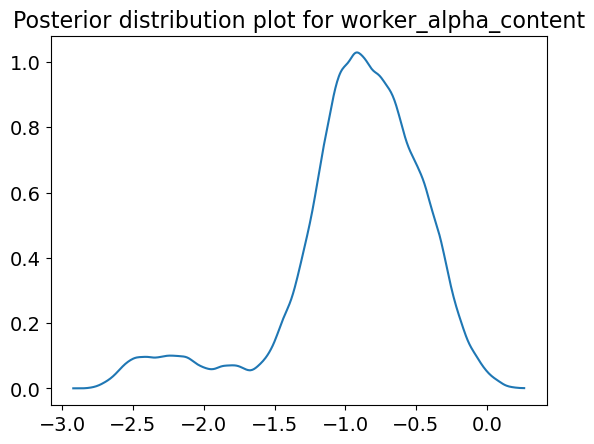

In [97]:
az.plot_dist(trace_04.posterior["alpha"].mean(axis=0))
plt.title("Posterior distribution plot for worker_alpha_content", size = 16)

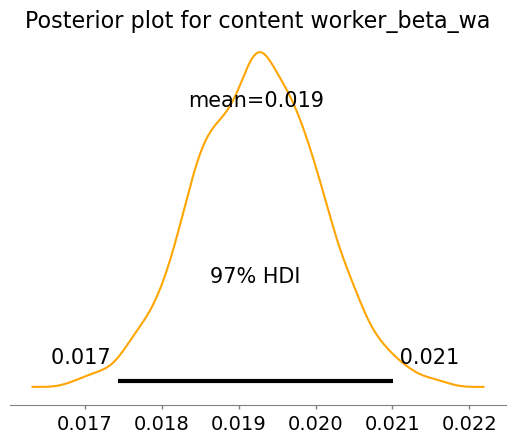

In [98]:
az.plot_posterior(trace_04.posterior["beta_wa"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for content worker_beta_wa", size = 16)
plt.savefig(fname="content_worker_beta_wa")

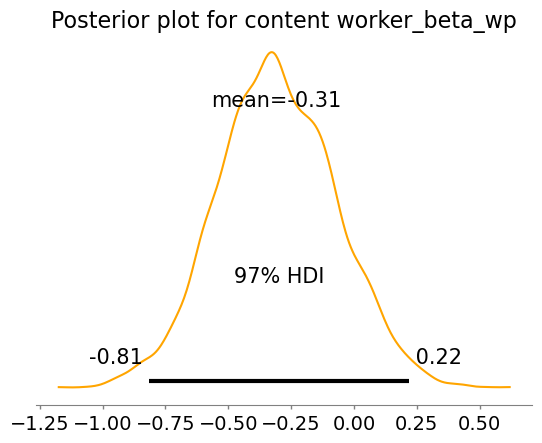

In [99]:
az.plot_posterior(trace_04.posterior["beta_wp"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for content worker_beta_wp", size = 16)
plt.savefig(fname="content_worker_beta_wp")

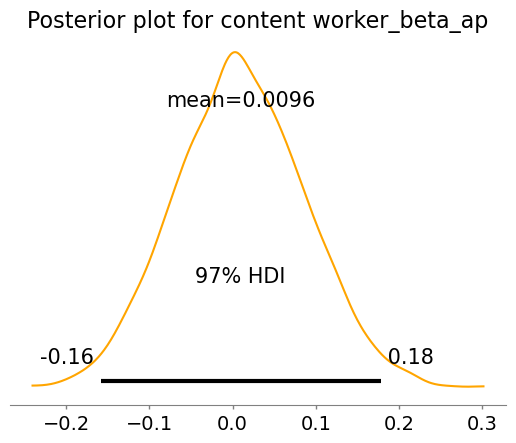

In [100]:
az.plot_posterior(trace_04.posterior["beta_ap"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for content worker_beta_ap", size = 16)
plt.savefig(fname="content_worker_beta_ap")

## Sad

In [101]:
with pm.Model() as m_05:
    #data
    s = pm.MutableData("sad", standardize(df.sad))
    
    worker = pm.MutableData("worker", df.workerid)
    
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    #priors
    alpha_bar = pm.Normal("alpha_bar", mu = 0, sigma=1)
    sigma_a = pm.Exponential("sigma_a", 1)
    
    alpha = pm.Normal("alpha", mu = alpha_bar, sigma = sigma_a, shape=len(df['workerid'].unique()))
    
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    
    mu = alpha[worker-1] + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    S = pm.Normal("S", mu = mu, sigma = sigma_a, observed = s)
    
    trace_05 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_bar, sigma_a, alpha, beta_wa, beta_wp, beta_ap]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


In [102]:
az.summary(trace_05, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha_bar,1.053,0.122,0.817,1.275
alpha[0],1.730,0.229,1.321,2.175
alpha[1],1.134,0.226,0.717,1.566
alpha[2],0.787,0.231,0.320,1.184
alpha[3],1.636,0.226,1.206,2.053
...,...,...,...,...
alpha[99],1.101,0.225,0.678,1.510
beta_wa,-0.020,0.001,-0.021,-0.018
beta_wp,-0.098,0.228,-0.530,0.316
beta_ap,0.038,0.080,-0.117,0.185


### Plots

Text(0.5, 1.0, 'Posterior distribution plot for worker_alpha_sad')

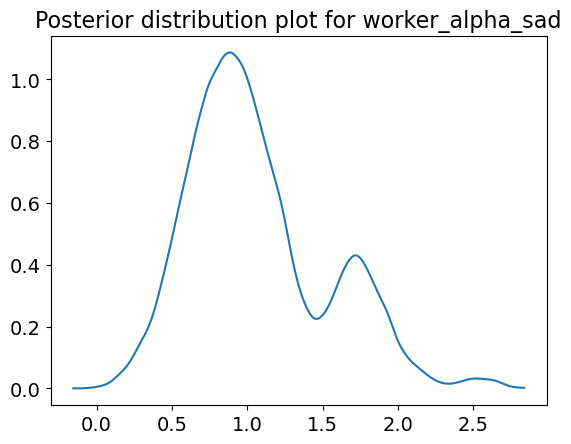

In [104]:
az.plot_dist(trace_05.posterior["alpha"].mean(axis=0))
plt.title("Posterior distribution plot for worker_alpha_sad", size = 16)

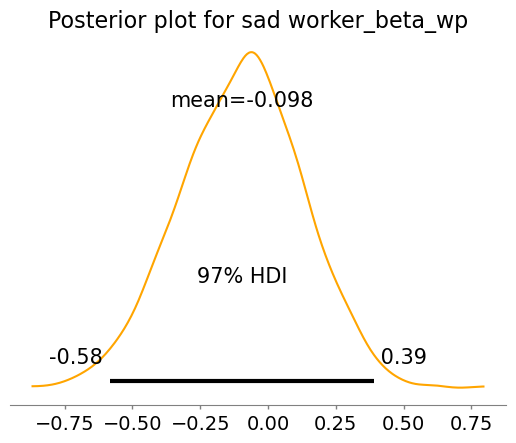

In [105]:
az.plot_posterior(trace_05.posterior["beta_wp"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for sad worker_beta_wp", size = 16)
plt.savefig(fname="sad_worker_beta_wp")

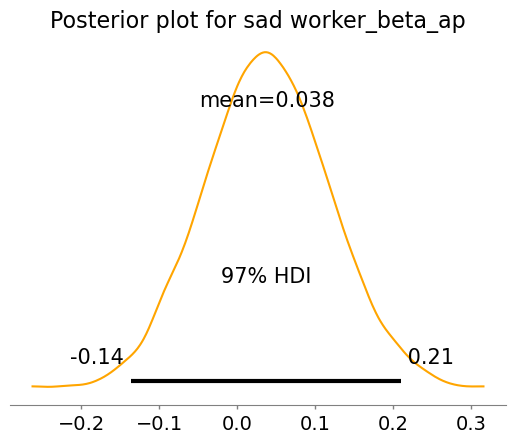

In [106]:
az.plot_posterior(trace_05.posterior["beta_ap"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for sad worker_beta_ap", size = 16)
plt.savefig(fname="sad_worker_beta_ap")

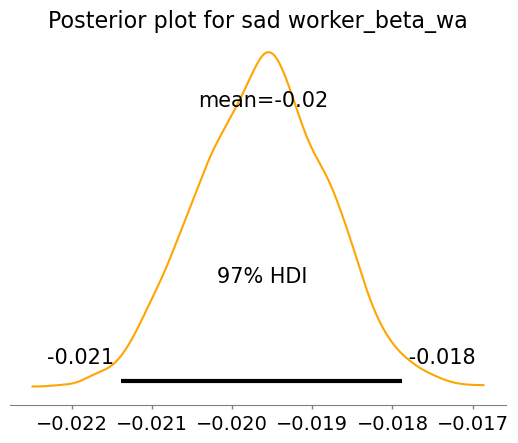

In [107]:
az.plot_posterior(trace_05.posterior["beta_wa"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for sad worker_beta_wa", size = 16)
plt.savefig(fname="sad_worker_beta_wa")

## Fear

In [108]:
with pm.Model() as m_06:
    #data
    f = pm.MutableData("fear", standardize(df.fear))
    
    worker = pm.MutableData("worker", df.workerid)
    
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    #priors
    alpha_bar = pm.Normal("alpha_bar", mu = 0, sigma=1)
    sigma_a = pm.Exponential("sigma_a", 1)
    
    alpha = pm.Normal("alpha", mu = alpha_bar, sigma = sigma_a, shape=len(df['workerid'].unique()))
    
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    
    mu = alpha[worker-1] + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    F = pm.Normal("F", mu = mu, sigma = sigma_a, observed = f)
    
    trace_06 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_bar, sigma_a, alpha, beta_wa, beta_wp, beta_ap]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


In [109]:
az.summary(trace_06, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha_bar,0.265,0.125,0.014,0.484
alpha[0],0.072,0.234,-0.363,0.505
alpha[1],-0.027,0.235,-0.465,0.417
alpha[2],-0.003,0.231,-0.444,0.421
alpha[3],0.082,0.235,-0.360,0.513
...,...,...,...,...
alpha[99],-0.010,0.236,-0.464,0.432
beta_wa,-0.005,0.001,-0.006,-0.003
beta_wp,-0.128,0.235,-0.575,0.309
beta_ap,0.079,0.081,-0.068,0.234


### Plots

Text(0.5, 1.0, 'Posterior distribution plot for worker_alpha_fear')

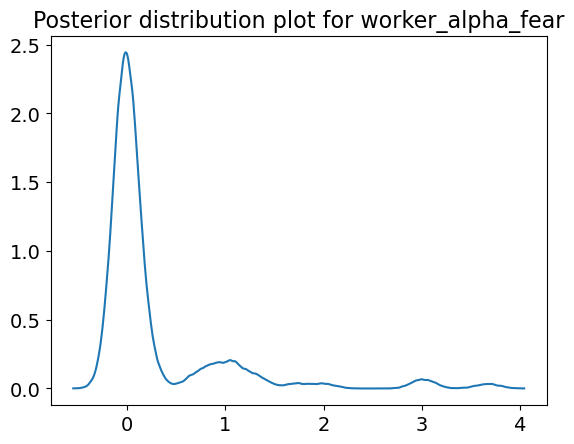

In [111]:
az.plot_dist(trace_06.posterior["alpha"].mean(axis=0))
plt.title("Posterior distribution plot for worker_alpha_fear", size = 16)

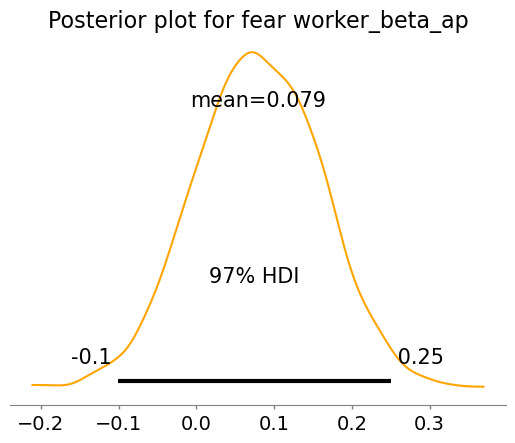

In [112]:
az.plot_posterior(trace_06.posterior["beta_ap"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for fear worker_beta_ap", size = 16)
plt.savefig(fname="fear_worker_beta_ap")

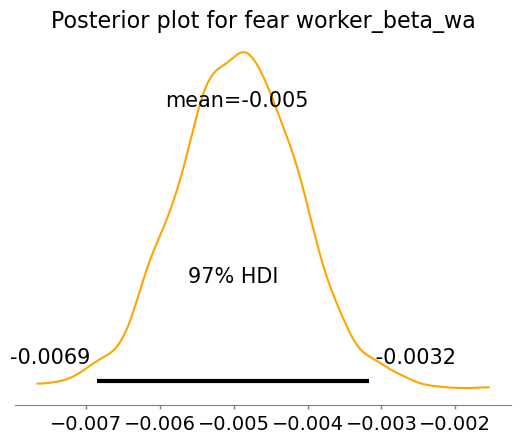

In [113]:
az.plot_posterior(trace_06.posterior["beta_wa"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for fear worker_beta_wa", size = 16)
plt.savefig(fname="fear_worker_beta_wa")

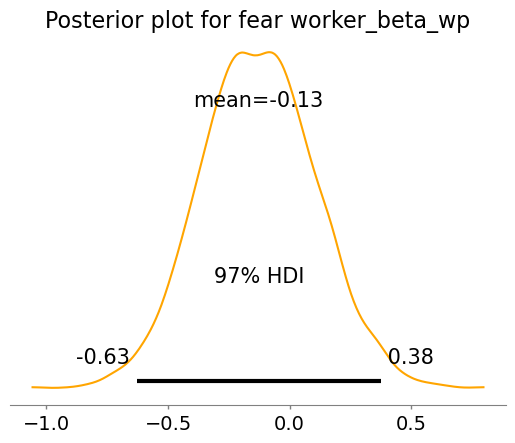

In [114]:
az.plot_posterior(trace_06.posterior["beta_wp"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for fear worker_beta_wp", size = 16)
plt.savefig(fname="fear_worker_beta_wp")

## Disgust

In [115]:
with pm.Model() as m_07:
    #data
    disg = pm.MutableData("disgust", standardize(df.disgust))
    
    worker = pm.MutableData("worker", df.workerid)
    
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    #priors
    alpha_bar = pm.Normal("alpha_bar", mu = 0, sigma=1)
    sigma_a = pm.Exponential("sigma_a", 1)
    
    alpha = pm.Normal("alpha", mu = alpha_bar, sigma = sigma_a, shape=len(df['workerid'].unique()))
    
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    
    mu = alpha[worker-1] + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    Disg = pm.Normal("Disg", mu = mu, sigma = sigma_a, observed = disg)
    
    trace_07 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_bar, sigma_a, alpha, beta_wa, beta_wp, beta_ap]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


In [116]:
az.summary(trace_07, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha_bar,0.805,0.122,0.588,1.037
alpha[0],1.056,0.235,0.611,1.492
alpha[1],1.113,0.236,0.681,1.550
alpha[2],0.579,0.232,0.126,1.001
alpha[3],1.489,0.237,1.033,1.923
...,...,...,...,...
alpha[99],0.404,0.230,-0.042,0.824
beta_wa,-0.014,0.001,-0.016,-0.012
beta_wp,-0.355,0.234,-0.790,0.089
beta_ap,0.109,0.082,-0.046,0.264


### Plots

Text(0.5, 1.0, 'Posterior distribution plot for worker_alpha_disgust')

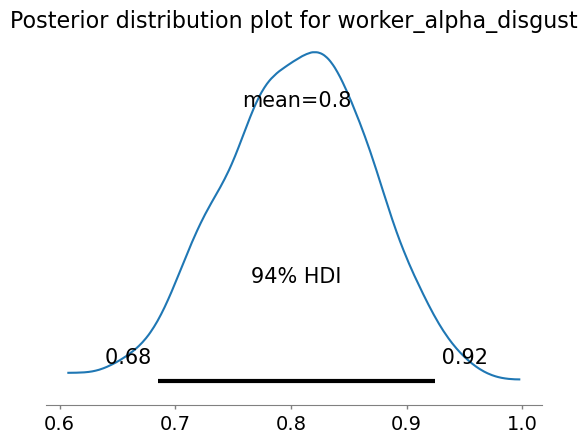

In [118]:
az.plot_posterior(trace_07.posterior["alpha_bar"].mean(axis=0))
plt.title("Posterior distribution plot for worker_alpha_disgust", size = 16)

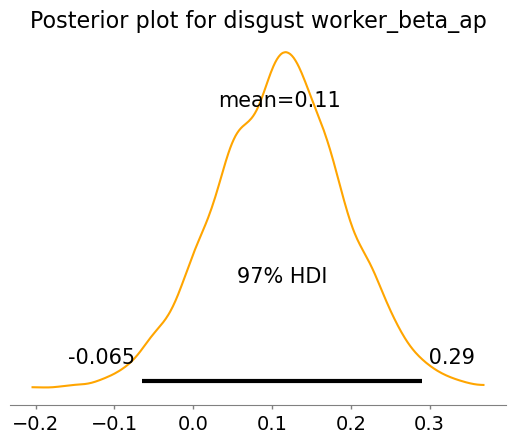

In [119]:
az.plot_posterior(trace_07.posterior["beta_ap"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for disgust worker_beta_ap", size = 16)
plt.savefig(fname="disgust_worker_beta_ap")

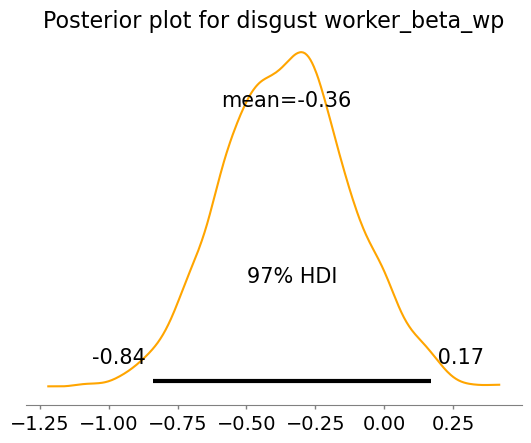

In [120]:
az.plot_posterior(trace_07.posterior["beta_wp"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for disgust worker_beta_wp", size = 16)
plt.savefig(fname="disgust_worker_beta_wp")

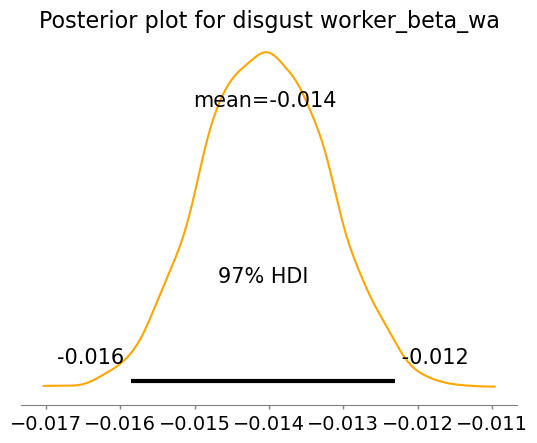

In [121]:
az.plot_posterior(trace_07.posterior["beta_wa"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for disgust worker_beta_wa", size = 16)
plt.savefig(fname="disgust_worker_beta_wa")

## Surprise

In [122]:
with pm.Model() as m_08:
    #data
    sur = pm.MutableData("surprise", standardize(df.surprise))
    
    worker = pm.MutableData("worker", df.workerid)
    
    wa = pm.MutableData("wa", df.win)
    wp = pm.MutableData("wp", df.winProb)
    ap = pm.MutableData("ap", df.angleProp)
    
    #priors
    alpha_bar = pm.Normal("alpha_bar", mu = 0, sigma=1)
    sigma_a = pm.Exponential("sigma_a", 1)
    
    alpha = pm.Normal("alpha", mu = alpha_bar, sigma = sigma_a, shape=len(df['workerid'].unique()))
    
    beta_wa = pm.Normal("beta_wa",mu= 0, sigma=10)
    beta_wp = pm.Normal("beta_wp",mu= 0, sigma=10)
    beta_ap = pm.Normal("beta_ap",mu= 0, sigma=10)
    
    mu = alpha[worker-1] + beta_ap * ap + beta_wa * wa + beta_wp * wp
    
    Sur = pm.Normal("Sur", mu = mu, sigma = sigma_a, observed = sur)
    
    trace_08 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_bar, sigma_a, alpha, beta_wa, beta_wp, beta_ap]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


In [123]:
az.summary(trace_08, kind="stats")

,mean,sd,hdi_3%,hdi_97%
alpha_bar,0.304,0.130,0.064,0.551
alpha[0],0.793,0.239,0.381,1.260
alpha[1],0.385,0.243,-0.088,0.824
alpha[2],-0.139,0.241,-0.604,0.307
alpha[3],0.332,0.244,-0.117,0.794
...,...,...,...,...
alpha[99],1.033,0.238,0.605,1.489
beta_wa,0.013,0.001,0.011,0.015
beta_wp,-3.100,0.246,-3.576,-2.650
beta_ap,0.047,0.085,-0.115,0.207


### Plots

Text(0.5, 1.0, 'Posterior distribution plot for worker_alpha_surprise')

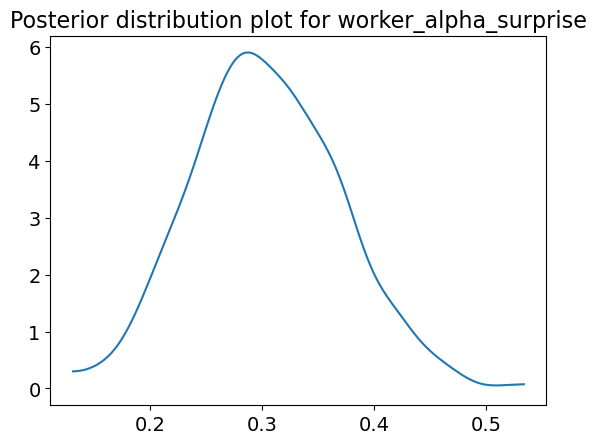

In [125]:
az.plot_dist(trace_08.posterior["alpha_bar"].mean(axis=0))
plt.title("Posterior distribution plot for worker_alpha_surprise", size = 16)

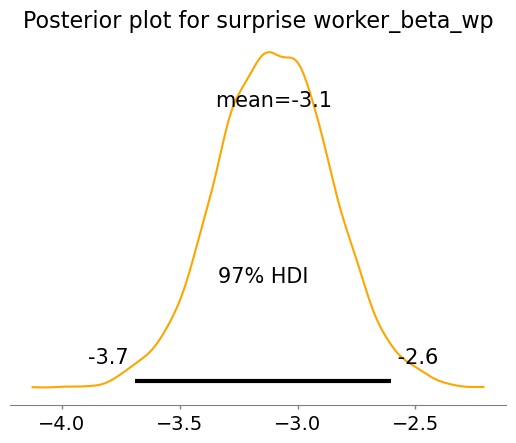

In [126]:
az.plot_posterior(trace_08.posterior["beta_wp"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for surprise worker_beta_wp", size = 16)
plt.savefig(fname="surprise_worker_beta_wp")

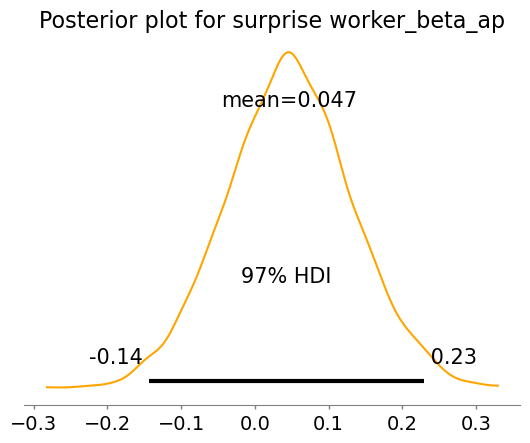

In [127]:
az.plot_posterior(trace_08.posterior["beta_ap"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for surprise worker_beta_ap", size = 16)
plt.savefig(fname="surprise_worker_beta_ap")

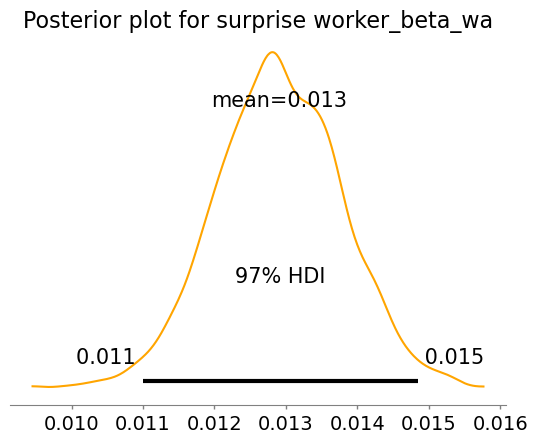

In [128]:
az.plot_posterior(trace_08.posterior["beta_wa"], point_estimate="mean", color="orange",
                 hdi_prob=0.97)
plt.title("Posterior plot for surprise worker_beta_wa", size = 16)
plt.savefig(fname="surprise_worker_beta_wa")